<a href="https://colab.research.google.com/github/sirlapat/ML_Assignment1/blob/main/ML_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [396]:
# t_u, t_c
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)


In [397]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b #w2 * t_u ** 2 + w1 * t_u + b.

In [398]:
def custom_loss(t_p, t_c):
    loss = torch.mean((t_p - t_c)**2)
    return loss


In [399]:
def custom_training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        predictions = model(t_u, *params)
        loss = loss_fn(predictions, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [400]:
import torch.optim as optim
optim_attributes_and_methods = dir(optim)
print(optim_attributes_and_methods)



['ASGD', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional', '_multi_tensor', 'lr_scheduler', 'swa_utils']


In [401]:
t_un = 0.1 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)

num_epochs = 5000
for epoch in range(1, num_epochs + 1):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 675.7944
Epoch 500, Loss: 2.7825
Epoch 1000, Loss: 2.4860
Epoch 1500, Loss: 2.2615
Epoch 2000, Loss: 2.1441
Epoch 2500, Loss: 2.1019
Epoch 3000, Loss: 2.0921
Epoch 3500, Loss: 2.0908
Epoch 4000, Loss: 2.0907
Epoch 4500, Loss: 2.0907
Epoch 5000, Loss: 2.0907
tensor([  2.4760,   0.2830, -10.6496], requires_grad=True)


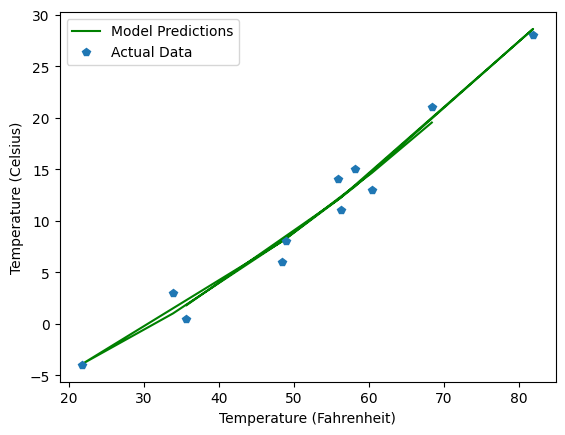

In [402]:
predictions = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), predictions.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [403]:
# Multiply t_u by 0.1 to get t_un
t_un = 0.1 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.02

optimizer = optim.Adam([params], lr=learning_rate)
for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 675.7944
Epoch 500, Loss: 4.0312
Epoch 1000, Loss: 2.9611
Epoch 1500, Loss: 2.8551
Epoch 2000, Loss: 2.7636
Epoch 2500, Loss: 2.6583
Epoch 3000, Loss: 2.5447
Epoch 3500, Loss: 2.4302
Epoch 4000, Loss: 2.3237
Epoch 4500, Loss: 2.2341
Epoch 5000, Loss: 2.1674
tensor([ 1.5916,  0.3646, -8.4476], requires_grad=True)


In [404]:
t_un_numpy = t_un.numpy()
print("t_un as NumPy array:", t_un_numpy)



t_un as NumPy array: [3.5700002 5.59      5.82      8.190001  5.63      4.8900003 3.39
 2.18      4.84      6.0400004 6.84     ]


In [405]:
t_p_numpy = t_p.detach().numpy()
print("t_p as NumPy array:", t_p_numpy)

t_p as NumPy array: [nan nan nan nan nan nan nan nan nan nan nan]


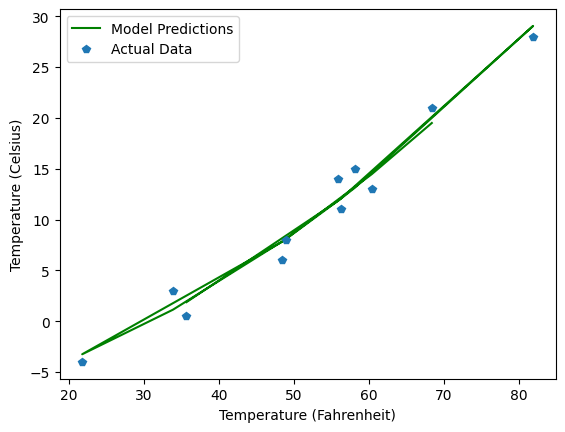

In [406]:
predictions = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), predictions.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [407]:
# Multiply t_u by 0.1 to get t_un
t_un = 0.1 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.03

optimizer = optim.Adam([params], lr=learning_rate)
for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 675.7944
Epoch 500, Loss: 3.2154
Epoch 1000, Loss: 2.8660
Epoch 1500, Loss: 2.7456
Epoch 2000, Loss: 2.6095
Epoch 2500, Loss: 2.4708
Epoch 3000, Loss: 2.3432
Epoch 3500, Loss: 2.2389
Epoch 4000, Loss: 2.1651
Epoch 4500, Loss: 2.1212
Epoch 5000, Loss: 2.1004
tensor([ 2.1626,  0.3119, -9.8693], requires_grad=True)


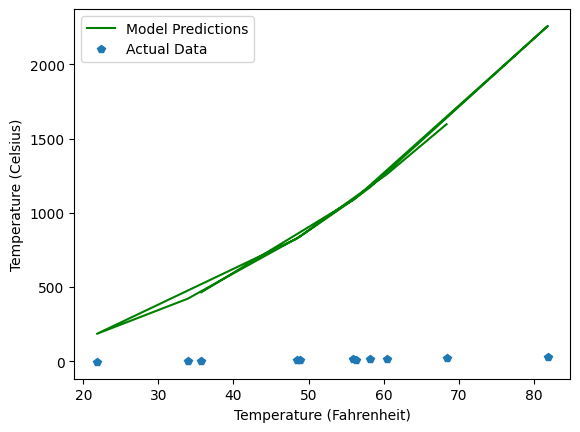

In [408]:
# predictions = model(t_un, *params)
t_p = model(t_u, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [409]:
# Multiply t_u by 0.1 to get t_un
t_un = 0.1 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001

optimizer = optim.Adam([params], lr=learning_rate)
for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 675.7944
Epoch 500, Loss: 578.2527
Epoch 1000, Loss: 491.2365
Epoch 1500, Loss: 413.8677
Epoch 2000, Loss: 345.2539
Epoch 2500, Loss: 284.6672
Epoch 3000, Loss: 231.5106
Epoch 3500, Loss: 185.2833
Epoch 4000, Loss: 145.5521
Epoch 4500, Loss: 111.9216
Epoch 5000, Loss: 84.0093
tensor([ 0.5698,  0.5721, -0.4337], requires_grad=True)


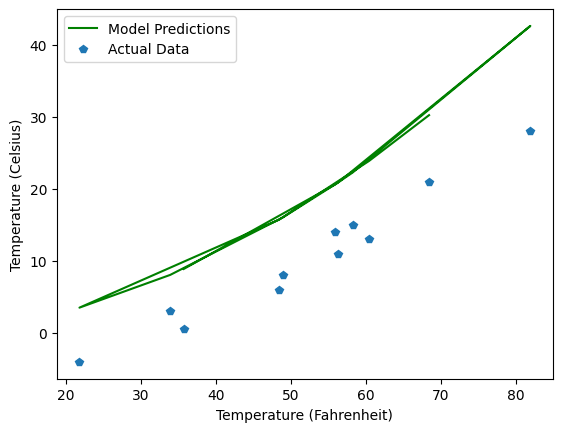

In [410]:
# predictions = model(t_un, *params)
t_p = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [411]:
# Multiply t_u by 0.1 to get t_un
t_un = 0.1 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1

optimizer = optim.SGD([params], lr=learning_rate)
for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 675.7944
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan
Epoch 3000, Loss: nan
Epoch 3500, Loss: nan
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan
Epoch 5000, Loss: nan
tensor([nan, nan, nan], requires_grad=True)


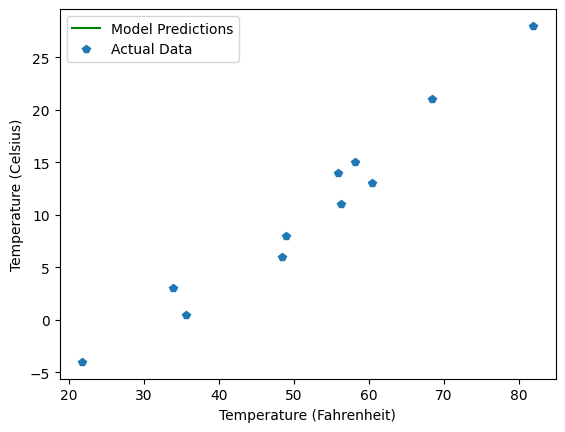

In [412]:
# predictions = model(t_un, *params)
t_p = model(t_u, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [413]:
# Set t_un equal to t_u
t_un = t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.00000001
optimizer = optim.SGD([params], lr=learning_rate)

for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)

Epoch 1, Loss: 11709471.0000
Epoch 500, Loss: 203.5310
Epoch 1000, Loss: 202.9296
Epoch 1500, Loss: 202.3291
Epoch 2000, Loss: 201.7295
Epoch 2500, Loss: 201.1309
Epoch 3000, Loss: 200.5331
Epoch 3500, Loss: 199.9362
Epoch 4000, Loss: 199.3402
Epoch 4500, Loss: 198.7452
Epoch 5000, Loss: 198.1511
tensor([ 9.6692e-01, -1.1139e-02, -9.4794e-04], requires_grad=True)


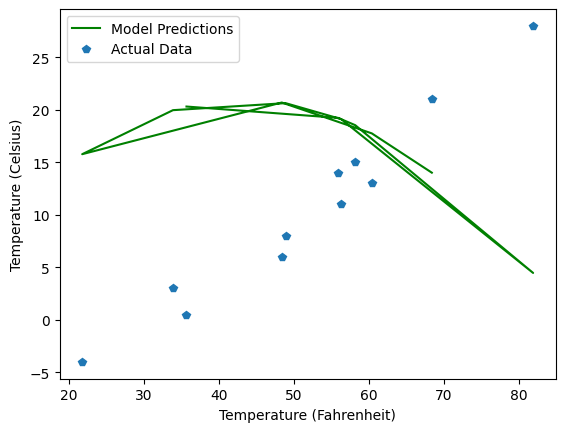

In [414]:
# predictions = model(t_un, *params)
t_p = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [415]:
# Set t_un equal to t_u
t_un = t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.00001
optimizer = optim.SGD([params], lr=learning_rate)

for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)

Epoch 1, Loss: 11709471.0000
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan
Epoch 3000, Loss: nan
Epoch 3500, Loss: nan
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan
Epoch 5000, Loss: nan
tensor([nan, nan, nan], requires_grad=True)


In [416]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [417]:
# Use the URL for the raw CSV data

df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [418]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [419]:
scaler = MinMaxScaler()
df[input_features + [output_feature]] = scaler.fit_transform(df[input_features + [output_feature]])


In [420]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X = df[input_features].values
y = df[[output_feature]].values

In [421]:
X_t = torch.tensor(X)
Y_t = torch.tensor(y)

In [422]:
X_t

tensor([[0.3966, 0.6000, 0.3333, 0.6667, 0.6667],
        [0.5024, 0.6000, 1.0000, 1.0000, 1.0000],
        [0.5711, 0.4000, 0.3333, 0.3333, 0.6667],
        ...,
        [0.1354, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0866, 0.4000, 0.0000, 0.0000, 0.0000],
        [0.1512, 0.4000, 0.0000, 0.3333, 0.0000]], dtype=torch.float64)

In [423]:
Y_t

tensor([[1.0000],
        [0.9091],
        [0.9091],
        [0.9061],
        [0.8364],
        [0.7879],
        [0.7273],
        [0.7273],
        [0.7030],
        [0.6970],
        [0.6970],
        [0.6867],
        [0.6545],
        [0.6485],
        [0.6485],
        [0.6364],
        [0.6364],
        [0.6242],
        [0.6182],
        [0.6152],
        [0.6061],
        [0.6000],
        [0.5970],
        [0.5970],
        [0.5909],
        [0.5879],
        [0.5812],
        [0.5758],
        [0.5758],
        [0.5758],
        [0.5758],
        [0.5758],
        [0.5667],
        [0.5576],
        [0.5515],
        [0.5481],
        [0.5448],
        [0.5394],
        [0.5379],
        [0.5333],
        [0.5303],
        [0.5273],
        [0.5152],
        [0.5152],
        [0.5030],
        [0.5030],
        [0.5000],
        [0.4970],
        [0.4939],
        [0.4909],
        [0.4909],
        [0.4909],
        [0.4848],
        [0.4848],
        [0.4848],
        [0

In [424]:
def model(X, W, B):
    return torch.sum(X * W, dim=1) + B

In [425]:
weights = torch.ones(5)  # Consolidating W1, W2, W3, W4, W5 into a single tensor, because of 5 inputs
bias = torch.zeros(1)    # Bias as a single value

In [426]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)

In [427]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

((436, 5), (436, 1), (109, 5), (109, 1))

In [428]:
X_train = torch.tensor(train_X)
y_train =  torch.tensor(train_Y)
X_val =  torch.tensor(val_X)
y_val =  torch.tensor(val_Y)

In [429]:
def custom_training_loop(n_epochs, optimizer, weights, bias, X_train, X_val, y_train, y_val):

    for epoch in range(1, n_epochs + 1):
        y_train_p = model(X_train, weights, bias)
        train_loss = loss_fn(y_train_p, y_train)

        y_val_p = model(X_train, weights, bias)
        val_loss = loss_fn(y_val_p, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return weights, bias

In [430]:

# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([weights, bias], lr=learning_rate)

custom_training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)



Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([4.3523e-06, 4.4021e-06, 4.0123e-06, 4.2044e-06, 4.1834e-06],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [431]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.02
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)

Epoch 500, Training loss 0.0234, Validation loss 0.0390
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([ 4.1254e-08,  8.8942e-08, -2.3839e-08, -7.4735e-10,  2.3646e-09],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [432]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.03
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)

Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([ 1.5577e-08,  3.3584e-08, -9.0013e-09, -2.8219e-10,  8.9285e-10],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [433]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)

Epoch 500, Training loss 1.1064, Validation loss 1.2578
Epoch 1000, Training loss 0.9080, Validation loss 1.0373
Epoch 1500, Training loss 0.7402, Validation loss 0.8500
Epoch 2000, Training loss 0.5992, Validation loss 0.6921
Epoch 2500, Training loss 0.4823, Validation loss 0.5605
Epoch 3000, Training loss 0.3869, Validation loss 0.4525
Epoch 3500, Training loss 0.3107, Validation loss 0.3656
Epoch 4000, Training loss 0.2516, Validation loss 0.2974
Epoch 4500, Training loss 0.2072, Validation loss 0.2457
Epoch 5000, Training loss 0.1752, Validation loss 0.2078


(tensor([0.6064, 0.6119, 0.5784, 0.5884, 0.5866], requires_grad=True),
 tensor([-0.3670], requires_grad=True))

In [434]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)

Epoch 500, Training loss 0.0235, Validation loss 0.0390
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


(tensor([ 5.8444e-07,  1.6221e-06, -6.0470e-07, -4.4821e-08,  3.9729e-08],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [ ]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.02
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)


Epoch 500, Training loss 0.0447, Validation loss 0.0603
Epoch 1000, Training loss 0.0284, Validation loss 0.0433
Epoch 1500, Training loss 0.0252, Validation loss 0.0404
Epoch 2000, Training loss 0.0240, Validation loss 0.0394
Epoch 2500, Training loss 0.0235, Validation loss 0.0390


In [ ]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.03
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)

In [ ]:
# params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
bias = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([weights, bias], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    X_train = X_train,
    X_val = X_val,
    y_train = y_train,
    y_val = y_val)